# Proble 2f and 2g was originally incorrect in the video
# See the explanation below for the correct answer

## 1.4 Problem 2f

## Table(row, column)

- In the previous code in Disc4_PS2 I mistakenly wrote table(column, row)
    - I also mistakenly wrote this in Disc3_PS2 but my answer in that example is correct because I followed the table(row, column format)

### 1.4.1 Check that table() is row, column

In [8]:
# Note that polity2 observations are in the column while wealth are in the row
table(df$wealth, df$polity2) 

   
    -9 -8 -7 -6 -5 -4 -3 -2 -1  0  2  3  4  5  6  7  8  9 10
  1  2  1 20  3  2  0  0  0  1  1  0  0  1  0  2  0  3  0  1
  2  1  2  1  2  2  1  1  1  0  1  2  2  1  4  3  1  7  4  5
  3  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  3 22

## Problem 2f: Answer

In [9]:
#(row, column)
freq_table = table(df$wealth, df$regime) 

#
rownames(freq_table) = c('Wealth 1', 'Wealth 2', 'Wealth 3')
colnames(freq_table) = c('Regime 1', 'Regime 2', 'Regime 3')
freq_table 

          
           Regime 1 Regime 2 Regime 3
  Wealth 1       26        5        6
  Wealth 2        6       15       20
  Wealth 3        0        1       26

## 1.5 Problem 2g

### 1.5.1 prop.table()
- Percentage of total observations
    - The top left .24 can be interpreted as follows:
        - Countries with a wealth of 1 and of regime 1 represent 24% of the sample
- The total of all 9 cells adds to 1

In [11]:
prop.table(freq_table)

          
             Regime 1   Regime 2   Regime 3
  Wealth 1 0.24761905 0.04761905 0.05714286
  Wealth 2 0.05714286 0.14285714 0.19047619
  Wealth 3 0.00000000 0.00952381 0.24761905

### 1.5.2 prop.table(freq_table, #)
- 1 is conditional on row
- 2 is conditional on column

### 1.5.2.1 Conditional on row
#### Note that the percentages on the ROWS total 1

In [15]:
prop.table(freq_table,1)

          
             Regime 1   Regime 2   Regime 3
  Wealth 1 0.70270270 0.13513514 0.16216216
  Wealth 2 0.14634146 0.36585366 0.48780488
  Wealth 3 0.00000000 0.03703704 0.96296296

## Problem 2g: answer
### 1.5.2.2 Conditional on column
#### Note that the percentages on the COLUMNS total 1

In [14]:
prop.table(freq_table,2)

          
             Regime 1   Regime 2   Regime 3
  Wealth 1 0.81250000 0.23809524 0.11538462
  Wealth 2 0.18750000 0.71428571 0.38461538
  Wealth 3 0.00000000 0.04761905 0.50000000


# Problem set 2

- Below are the functions necessary to complete problem set 2

## A.1 Import data set

In [1]:
df = read.csv('demo.csv')
head(df,3)

country,polity2,gdp,regime,wealth
US,10,18054,3,3
CANADA,10,17173,3,3
DOMIN REP,6,2166,3,2


# 1. Review commands for PS2

## 1.1 Problem 2c

In [ ]:
plot(df$gdp, #x
     df$polity2, #y
     xlab="1/4 mile time", 
     ylab="Rear axel ratio",
     main="Answer 2.C",
     pch=19 #Sets dot)

## 1.2 Problem 2d

In [4]:
cor(df$gdp, df$wealth)

[1] 0.8721116

## 1.3 Problem 2e

### 1.3.1 Filter by regimes

In [5]:
autocracy_df = df[df$regime==1,]
democracy_df = df[df$regime==3,]

### 1.3.2 Plot two histograms

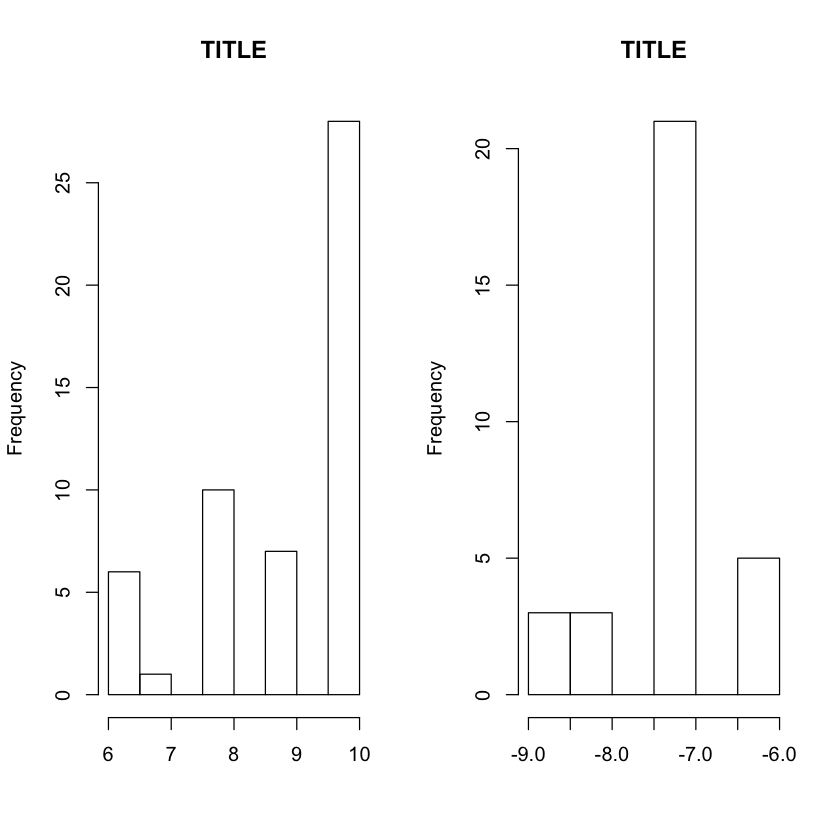

In [6]:
par(mfrow=c(1,2))
hist(democracy_df$polity2, xlab="", main="TITLE")
hist(autocracy_df$polity2, xlab="", main="TITLE")

# 2. DPLYR basics (OPTIONAL)

In [13]:
library(dplyr)

##  Why use libraries? The short answer: they are often easier to understand!

In [11]:
cor(df$gdp, df$wealth)

[1] 0.8721116

In [12]:
df %>% 
select(gdp, wealth) %>% 
cor()

,gdp,wealth
gdp,1.0000000,0.8721116
wealth,0.8721116,1.0000000


## 2.1 Select 
- Selects columns

In [15]:
df  %>% 
select(gdp, wealth, country)  %>% head(3)

gdp,wealth,country
18054,3,US
17173,3,CANADA
2166,2,DOMIN REP


## 2.2 Filter

### 2.2.1 Filter using =

In [29]:
df  %>% 
filter(regime==1)  %>% head(3)

country,polity2,gdp,regime,wealth
GUYANA,-7,1094,1,1
GUINEA-B'AU,-6,689,1,1
MALI,-7,531,1,1


### 2.2.2 Filter using < or >

In [30]:
df  %>% 
filter(gdp>10000)  %>% head(3)

country,polity2,gdp,regime,wealth
US,10,18054,3,3
CANADA,10,17173,3,3
UK,10,13217,3,3


### 2.2.3 Filter using | or &

In [23]:
df  %>% 
filter(gdp>17000 | gdp<500)  %>% head(3)

country,polity2,gdp,regime,wealth
US,10,18054,3,3
CANADA,10,17173,3,3
CHAD,-7,399,1,1


In [28]:
df  %>% 
filter(gdp>10000 & regime==2)  %>% head(3)

country,polity2,gdp,regime,wealth
SINGAPORE,-2,11710,2,3


## 2.3 Mutate 

In [39]:
df  %>% 
mutate(log_gdp = log(gdp),
      gdp_mean = mean(gdp),
      gdp_sd = sd(gdp),
      gdp_pct = percent_rank(gdp), #Percentile
      gdp_cumsum = cumsum(gdp)
      )%>% head(2)

country,polity2,gdp,regime,wealth,log_gdp,gdp_mean,gdp_sd,gdp_pct,gdp_cumsum
US,10,18054,3,3,9.801123,4832.295,4945.592,1.0000000,18054
CANADA,10,17173,3,3,9.751094,4832.295,4945.592,0.9903846,35227


## 2.4 Summarise

In [40]:
df %>% 
summarise(mean_gdp = mean(gdp),
        median_gdp = median(gdp),
         sum_gdp = sum(gdp),
         count_gdp = n(),
         first_gdp = first(gdp),
         last_gdp = last(gdp),
         variance = var(gdp),
         sd = sd(gdp))

mean_gdp,median_gdp,sum_gdp,count_gdp,first_gdp,last_gdp,variance,sd
4832.295,2777,507391,105,18054,4007,24458877,4945.592


## 2.5 Groupby

In [43]:
df  %>% 
group_by(regime) %>% 
summarise(
mean_gdp = mean(gdp))

regime,mean_gdp
1,1214.406
2,3123.286
3,7748.865


## 2.6 Combining functions with %<%

In [46]:
df  %>% 
select(gdp, regime) %>% 
group_by(regime) %>% 
mutate(gdp_log = log(gdp)) %>% 
summarise(mean_gdp = mean(gdp_log))  

regime,mean_gdp
1,6.895227
2,7.813782
3,8.635547


# THE FOLLOWING CODE COVERS FUNCTIONS NECESSARY FOR PROBLEM 3 THAT I FAILED TO COVER IN THE VIDEO

# Question 3: 
## Q.3.1 Creates 100 draws from the normal distribution



In [4]:
draws = 100
normal_data = rnorm(draws, mean =0, sd=1)
#Show first five data points by attaching [c(1:5)] to the end of the data
normal_data[c(1:5)] 

[1] -1.14907530 -1.76006519  0.06335827 -0.14259053 -1.00967743

## Q.3.2 Sample observations from distribution


In [ ]:
#Sample 10 from the normal_data we created above
sample_1 = sample(normal_data, 10)

#Sample 100 from the normal_data we created above
sample_2 = sample(normal_data, 100)

# 3. World bank data (EXTREMELY OPTIONAL)

In [ ]:
library(WDI)

## 3.1 Search for data

In [ ]:
WDIsearch(string="poverty", field = "name") %>% 
  as_tibble() 

## 3.2 Download data

In [ ]:
poverty_df = WDI(indicator="1.0.HCount.2.5usd", country='MX',start=2005, end=2019)
poverty_df